In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tomma.dubins_dynamics as dubins_dynamics
from tomma.dubins_dynamics import DubinsDynamics
from tomma.multi_agent_optimization import MultiAgentOptimization

In [2]:
dubins = DubinsDynamics(control=dubins_dynamics.CONTROL_LIN_ACC_ANG_VEL)
deg2rad = np.pi/180
x_bounds = np.array([
    [-10., 10.],
    [-10., 10.],
    [-1., 1.],
    [-np.inf, np.inf]
])
u_bounds = np.array([
    [-1, 1.],
    [-45*deg2rad, 45*deg2rad]
])

# Single Agent with Obstacles

In [3]:
x_bounds = np.array([
    [-1., 6.],
    [-1., 6.],
    [-1., 1.],
    [-np.inf, np.inf]
])
x0 = np.array([[0.0, 0.0, 0.0, np.pi/4]])
xf = np.array([[5.0, 5.0, 0.0, np.pi/4]])
planner = MultiAgentOptimization(dubins, num_timesteps=100)
planner.add_obstacle(np.array([1, 2]), .5)
planner.add_obstacle(np.array([1.5, 1.5]), .25)
planner.add_obstacle(np.array([3, 2.5]), .5)
planner.add_obstacle(np.array([4, 4]), .25)
planner.add_obstacle(np.array([3, 4]), .25)
planner.add_obstacle(np.array([3.5, 5.0]), .25)
planner.add_obstacle(np.array([4.0, 3.0]), .25)
planner.add_obstacle(np.array([4.5, 3.5]), .25)
planner.add_obstacle(np.array([2.5, 1.5]), .25)
planner.add_obstacle(np.array([2.0, 3.0]), .5)
planner.setup_min_time_opt(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds)
planner.opti.subject_to(planner.tf > 1.0)
planner.opti.subject_to(planner.tf < 20.0)
x, u, tf = planner.solve_opt()

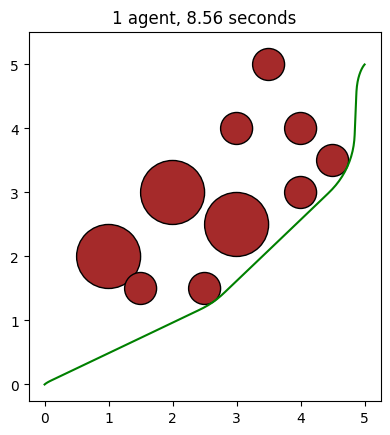

In [4]:
fig, ax = planner.draw_path()


# Multiple Agents

In [5]:
planner = MultiAgentOptimization(dubins, num_agents=2, num_timesteps=100)
x0 = np.array([[0.0, 0.0, 0.0, np.pi/4],
               [5.0, 5.0, 0.0, 5*np.pi/4]])
xf = np.array([[5.0, 5.0, 0.0, np.pi/4],
              [0.0, 0.0, 0.0, 5*np.pi/4]])


planner.setup_min_time_opt(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds)
x, u, tf = planner.solve_opt()

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '2 agents, 8.15 seconds'}>)

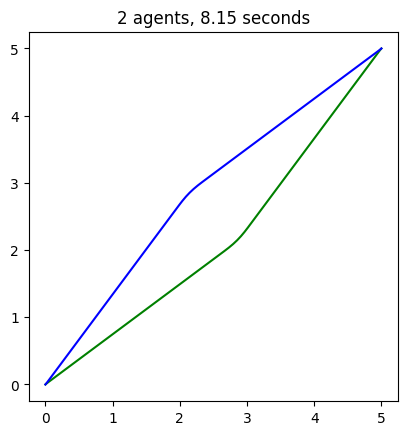

In [6]:
planner.draw_path()

In [7]:
x0 = np.array([[0.0, 0.0, 0.0, np.pi/4],
               [5.0, 5.0, 0.0, 5*np.pi/4],
               [2, 0, 0, 0]])
xf = np.array([[4.0, 5.0, 0.0, np.pi/4],
              [0.0, 1.0, 0.0, 5*np.pi/4],
              [2, 5, 0, 0]])
planner = MultiAgentOptimization(dubins, num_agents=3, num_timesteps=100)
planner.add_obstacle(np.array([2, 2]), .5)
planner.add_obstacle(np.array([3.5, 5.0]), .25)
planner.add_obstacle(np.array([4.0, 3.0]), .25)
planner.add_obstacle(np.array([4.5, 3.5]), .25)
planner.add_obstacle(np.array([2.5, 1.5]), .25)
planner.add_obstacle(np.array([2.0, 3.0]), .5)
planner.setup_min_time_opt(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds)
planner.opti.subject_to(planner.tf > 1.0) # planner can get stuck without this
x, u, tf = planner.solve_opt()

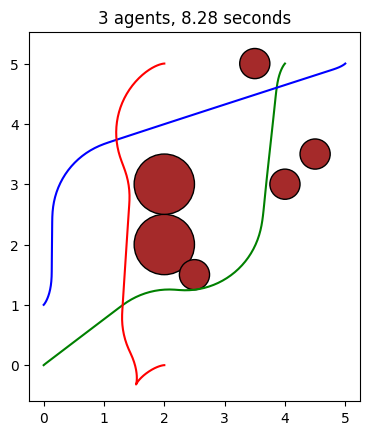

In [8]:
fig, ax = planner.draw_path()

# Four Agents

In [9]:
x0 = np.array([[0.0, 0.0, 0.0, np.pi/4],
               [5.0, 5.0, 0.0, 5*np.pi/4],
               [0.0, 5.0, 0.0, -np.pi/4],
               [5.0, 0.0, 0.0, 3*np.pi/4]])
xf = np.array([
    [5.0, 5.0, 0.0, np.pi/4],
    [0.0, 0.0, 0.0, 5*np.pi/4],
    [5.0, 0.0, 0.0, -np.pi/4],
    [0.0, 5.0, 0.0, 3*np.pi/4],
])
planner = MultiAgentOptimization(dubins, num_agents=4, num_timesteps=100)
planner.setup_min_time_opt(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds)
planner.opti.subject_to(planner.tf > 1.0) # planner can get stuck without this
x, u, tf = planner.solve_opt()

Text(0.5, 1.0, '4 agents, 11.57 seconds')

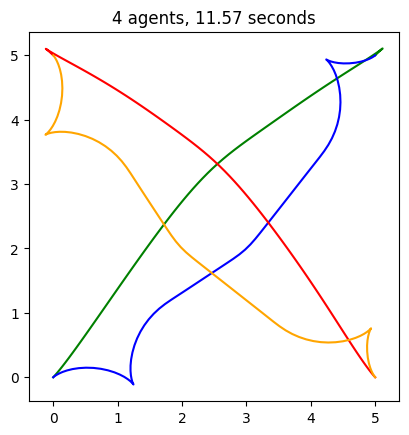

In [11]:
fig, ax = planner.draw_path()
ax.set_title(f'{planner.M} agents, {np.round(tf, 2)} seconds')
